# Objective and Importance

## Objective
The purpose of this analysis is to leverage **NHANES 2013–2014 data** to derive and convert a composite mental health score into a binary variable (e.g., indicating the presence or absence of clinically significant depressive symptoms). Specifically, the goal is to:

### Understand Mental Health Trends:
- Identify the prevalence of depressive symptoms among U.S. adults by classifying the continuous mental health score into a binary indicator.

### Support Predictive Modeling:
- Prepare the data for binary classification algorithms that can be used to predict mental health outcomes from various predictors (such as demographic, dietary, and lifestyle factors).

### Inform Healthcare Decisions:
- Generate insights that can help public health officials and healthcare providers understand which segments of the population are at higher risk, thereby guiding targeted screening, resource allocation, and intervention programs.

## Why This is Critical:
Accurate classification of mental health status is essential for tailoring healthcare interventions. By understanding trends in mental health and identifying high-risk groups, healthcare decision makers can allocate resources more efficiently, design better screening protocols, and implement effective preventive and therapeutic measures to reduce the overall burden of mental disorders.


# Dataset Overview

## Source & Period:
The dataset is drawn from the **National Health and Nutrition Examination Survey (NHANES)** for the **2013–2014 cycle**. NHANES is a nationally representative survey conducted by the **National Center for Health Statistics (NCHS)** under the **Centers for Disease Control and Prevention (CDC)**. Data collection combines in-person interviews, physical examinations, and laboratory tests, offering a comprehensive snapshot of the health and nutritional status of the **U.S. civilian, noninstitutionalized population** during that period.

## Main Subject Areas:

### Patient Demographics:
- Variables such as **age**, **gender**, **race/ethnicity**, **education level**, **socioeconomic status** (e.g., **income-to-poverty ratio**), and **marital status** provide context about the participants’ background and are crucial for identifying vulnerable subgroups.

### Behavioral and Lifestyle Factors:
- Information on **dietary intake** (collected via a **24-hour recall**), **physical activity**, and other **lifestyle behaviors** which may influence both physical and mental health outcomes.

### Mental Health Data:
- Questionnaire items specifically related to **mental health** (e.g., **depressive symptoms**) are used to derive a composite **mental_health_score**. This score is pivotal for identifying individuals at risk of depression or other mental disorders.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# ----------------------------
# 1. Load the datasets
# ----------------------------
# Replace the file paths with the correct paths on your system if needed.
questionnaire = pd.read_csv('/content/questionnaire.csv')
diet = pd.read_csv('/content/diet.csv')
demographic = pd.read_csv('/content/demographic.csv')

# Quick look at the data shapes and columns to ensure 'SEQN' is present
print("Questionnaire shape:", questionnaire.shape)
print("Diet shape:", diet.shape)
print("Demographic shape:", demographic.shape)

# ----------------------------
# Preparing the Target variable column
# ----------------------------

# Identify columns of interest

# a) Mental health outcomes (assumed to be DPQ010 to DPQ100)
# This creates a list of all columns that start with "DPQ"
mental_health_cols = [col for col in questionnaire.columns if col.startswith('DPQ')]


# ----------------------------
# Recode or clean specific values
# ----------------------------
# For instance, if your mental health items use specific codes to indicate missing or non-valid responses
# (e.g., 7 or 9), you can recode them to np.nan. Adjust the recoding as necessary.
for col in mental_health_cols:
    if col in questionnaire.columns:
        questionnaire[col] = questionnaire[col].replace({7: np.nan, 9: np.nan})


# ----------------------------
# Create composite scores for mental health outcomes
# ----------------------------
# Depending on the scoring algorithm (e.g., summing or weighting DPQ items), you might compute a score.
# For example, creating a total mental health score:
if mental_health_cols:
    questionnaire['mental_health_score'] = questionnaire[mental_health_cols].sum(axis=1)

# ----------------------------
# display the dataset
# ----------------------------
print(" Data preview:")
print(questionnaire.head())



Questionnaire shape: (10175, 953)
Diet shape: (9813, 168)
Demographic shape: (10175, 47)
 Data preview:
    SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ101  ALQ110  ALQ120Q  \
0  73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN      1.0   
1  73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN      7.0   
2  73559      1.0      NaN      NaN     NaN     NaN     1.0     NaN      0.0   
3  73560      1.0      NaN      NaN     NaN     NaN     NaN     NaN      NaN   
4  73561      1.0      NaN      NaN     NaN     NaN     1.0     NaN      0.0   

   ALQ120U  ...  WHD080L  WHD110  WHD120  WHD130  WHD140  WHQ150  WHQ030M  \
0      3.0  ...     40.0   270.0   200.0    69.0   270.0    62.0      NaN   
1      1.0  ...      NaN   240.0   250.0    72.0   250.0    25.0      NaN   
2      NaN  ...      NaN   180.0   190.0    70.0   228.0    35.0      NaN   
3      NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN      3.0   
4      NaN  ...      NaN   150

## Target Variable Assumptions

Based on both the NHANES documentation and published research on depression screening tools similar to the DPQ items (which are conceptually analogous to the PHQ‑9), a commonly recommended clinical cutoff is 10. In many studies using the PHQ‑9 as a depression screener, a summed score of 10 or above is considered indicative of clinically significant depressive symptoms (i.e., moderate depression). This cutoff has been shown to achieve good sensitivity and specificity for major depression.

### Assumptions:
- **Score Equivalence:** We assume that the DPQ items in your NHANES 2013–2014 questionnaire have been scored similarly to the PHQ‑9. In other words, higher scores on the DPQ items reflect more severe depressive symptoms.

- **Clinical Relevance:** The cutoff of 10 is well validated in the literature (Kroenke et al., 2001) and is widely used in NHANES-based studies that assess depression.


In [2]:
# Using a predefined clinical cutoff (if known)
clinical_cutoff = 10  #  cutoff based on domain knowledge
questionnaire['mental_health_binary'] = np.where(
    questionnaire['mental_health_score'] >= clinical_cutoff, 1, 0
)

# Display a preview of the new binary variables
print(questionnaire[['mental_health_score', 'mental_health_binary']].head())


   mental_health_score  mental_health_binary
0                  2.0                     0
1                  2.0                     0
2                  0.0                     0
3                  0.0                     0
4                 10.0                     1


In [3]:
#print the percentage of binary value
questionnaire['mental_health_binary'].value_counts(normalize=True)

,proportion
mental_health_binary,
0,0.942506
1,0.057494


# Diet Data Assumptions

##Assumptions
###Data Source & Timing:
We are using the first day 24‐hour dietary recall (DR1) data to capture the dietary intake of each participant.
###Derived Nutrients:
Nutrient intakes have been computed using the Food Patterns Equivalents Database (FPED) to translate food codes into nutrient and food group estimates.
###Population Characteristics:
We assume that the sample represents non‐pregnant, non‐lactating individuals aged 20+ years (or as defined for your analysis) and that mental health outcomes are defined either via the NHANES mental health questionnaire (e.g., DPQ items) or by a validated screening tool (e.g., PHQ‐9).
###Diet–Mental Health Link:
Based on the literature, certain macro- and micronutrients, overall energy intake, and food group consumption patterns are linked to brain health and mood regulation.

##Beneficial Dietary Variables (based on the assumptions)
###Total Energy & Macronutrients:

Total Energy Intake (DR1TKCAL): Overall caloric intake may impact mood regulation.
Carbohydrate Intake (DR1TCARB): Quality and quantity of carbs (e.g., complex vs. refined sugars) are important.

Protein Intake (DR1TPROT): Adequate protein supports neurotransmitter synthesis.
Total Fat Intake (DR1TFAT): Differentiating between healthy (unsaturated) and unhealthy (saturated) fats is key.
Saturated Fat Intake (if available): High saturated fat has been linked with inflammation and may affect mood.
###Fiber and Sugars:

Dietary Fiber (DR1TFIBE): Fiber supports gut health, which is increasingly linked to mental health through the gut–brain axis.
Added or Total Sugars (DR1TSUGAR or similar): Excessive refined sugar intake is associated with inflammation and may increase depression risk.
###Key Micronutrients & Bioactives:

Vitamin D (DR1TVITD): Low vitamin D status has been associated with depression.
B Vitamins:
Vitamin B6, Vitamin B12, and Folate (e.g., DR1T_FOLATE, DR1TB12 if available): These are critical for neurotransmitter production and brain function.
Minerals (e.g., Iron [DR1TIRON], Magnesium [DR1TMAGN]): Both play roles in neurochemical pathways and overall brain health.
###Omega-3 Fatty Acids:
While not always directly available as a single variable, intakes of EPA/DHA (or proxies computed from fish intake data) are important for neuronal function and anti-inflammatory effects.
###Food Group & Quality Measures:

Fruit and Vegetable Servings: High intakes are generally associated with a better nutrient profile and lower inflammation.
Whole Grain Intake: May contribute to steady energy release and overall better diet quality.
Dairy and Lean Protein Sources: These can provide essential amino acids and other nutrients linked to mental health.
Diet Quality Index Scores:
If available, a computed Healthy Eating Index (HEI) score, Mediterranean Diet Score, or similar index can summarize overall diet quality.
###Other Considerations:

Caffeine Intake (DR1TCAFF): Given its stimulating effects, caffeine intake may modify mood.
Alcohol Intake: Moderate consumption patterns (or abstinence) may also be informative when combined with dietary data.


In [4]:
dietary_cols = [
    # Total Energy & Macronutrients
    'DR1TKCAL',   # Total Energy Intake (kcal)
    'DR1TCARB',   # Total Carbohydrate Intake (g)
    'DR1TPROT',   # Total Protein Intake (g)
    'DR1TTFAT',   # Total Fat Intake (g)
    'DR1TSFAT',   # Saturated Fat Intake (g)

    # Fiber and Sugars
    'DR1TFIBE',   # Dietary Fiber (g)
    'DR1TSUGR',  # Added/Total Sugars (g)

    # Key Micronutrients & Bioactives
    'DR1TVD',   # Vitamin D Intake
    'DR1TFOLA', # Folate Intake (µg)
    'DR1TVB12',    # Vitamin B12 Intake (µg)
    'DR1TIRON',   # Iron Intake (mg)
    'DR1TMAGN',   # Magnesium Intake (mg)

    # Other Considerations
    'DR1TCAFF',   # Caffeine Intake (mg)
    'DR1TALCO' # Alcohol Intake
]

diet[dietary_cols].shape

(9813, 14)

# Assumptions for Demographics Data
###Population Focus:
We are focusing on adults (e.g., ages 20+ years) since many mental health studies target the adult population.

###Socioeconomic & Social Determinants:
Research shows that factors such as age, gender, race/ethnicity, education, income, and marital status are robust predictors of mental health outcomes. We assume that lower socioeconomic status, unstable marital status, and minority status can be risk factors for mental disorders.

###Standard NHANES Coding:
The variable names follow the standard NHANES naming conventions for the 2013–2014 cycle.

##Beneficial Demographic Variables
###Unique Identifier:

SEQN – Essential for merging with other datasets (e.g., mental health or lifestyle questionnaires).
###Age:

RIDAGEYR – Age in years at the time of the interview. Age is a critical predictor as mental health risks can vary with age.
###Gender:

RIAGENDR – Sex of the participant (typically coded as 1 = Male, 2 = Female). Differences in prevalence of mental disorders are well documented by gender.
###Race/Ethnicity:

RIDRETH1 – Self-reported race/ethnicity (e.g., Mexican American, Other Hispanic, Non-Hispanic White, Non-Hispanic Black, Other Race including multi-racial). Ethnic and cultural backgrounds often influence mental health risk and access to care.
###Educational Attainment:

DMDEDUC2 – Education level for adults. Lower educational attainment is frequently associated with increased risk of mental health issues.
###Socioeconomic Status:

INDFMPIR – Ratio of family income to the poverty threshold. This continuous variable is a key indicator of socioeconomic position.
###Marital Status:

DMDMARTL – Marital status (e.g., married, widowed, divorced, separated, never married, living with partner). Marital status can impact social support and mental health.
###Household Size:

DMDHHSIZ – Number of individuals in the household. Household composition and crowding may influence stress and mental well-being.
###Country of Birth / Nativity:

DMDBORN4 – Country of birth, which distinguishes between those born in the 50 U.S. states (or DC), U.S. territories, or abroad. Nativity can be associated with acculturative stress and mental health risk.

In [5]:
demographic_cols = [
    'SEQN',       # Unique Identifier for merging datasets
    'RIDAGEYR',   # Age in years at the time of the interview
    'RIAGENDR',   # Gender (typically 1 = Male, 2 = Female)
    'RIDRETH1',   # Self-reported Race/Ethnicity
    'DMDEDUC2',   # Educational Attainment (education level for adults)
    'INDFMPIR',   # Family Income to Poverty Ratio (socioeconomic status)
    'DMDMARTL',   # Marital Status
    'DMDHHSIZ',   # Household Size (number of individuals in the household)
    'DMDBORN4'    # Country of Birth / Nativity
]
demographic[demographic_cols].shape

(10175, 9)

In [6]:
# ----------------------------
# 2. Merge the datasets
# ----------------------------
# We use 'SEQN' as the unique identifier for merging.
# Here, an inner join is used to ensure that only participants with data in all files are included.
merged_data = questionnaire.merge(diet, on='SEQN', how='inner').merge(demographic, on='SEQN', how='inner')
print("Merged data shape:", merged_data.shape)

key_cols =  dietary_cols + demographic_cols + ['mental_health_binary']
merged_data_filter = merged_data[key_cols]

# Convert numeric columns to the appropriate types, handling errors by converting to NaN
for col in  dietary_cols + demographic_cols:
    if col in merged_data_filter.columns:
        merged_data_filter.loc[:, col] = pd.to_numeric(merged_data_filter[col], errors='coerce')

df = merged_data_filter.copy()
print("Merged Filter data shape:", merged_data_filter.shape)
merged_data_filter.head()


Merged data shape: (9813, 1168)
Merged Filter data shape: (9813, 24)


,DR1TKCAL,DR1TCARB,DR1TPROT,DR1TTFAT,DR1TSFAT,DR1TFIBE,DR1TSUGR,DR1TVD,DR1TFOLA,DR1TVB12,...,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,INDFMPIR,DMDMARTL,DMDHHSIZ,DMDBORN4,mental_health_binary
0,1574.0,239.59,43.63,52.81,17.819,10.8,176.47,3.3,285.0,2.79,...,73557,69,1,4,3.0,0.84,4.0,3,1,0
1,5062.0,423.78,338.13,124.29,53.408,16.7,44.99,15.2,1243.0,21.45,...,73558,54,1,3,3.0,1.78,1.0,4,1,0
2,1743.0,224.39,64.61,65.97,25.263,9.9,102.90,4.0,423.0,3.78,...,73559,72,1,3,4.0,4.51,1.0,2,1,0
3,1490.0,162.92,77.75,58.27,23.511,10.6,80.58,9.9,275.0,8.76,...,73560,9,1,3,NaN,2.52,NaN,4,1,0
4,1421.0,178.20,55.24,55.36,4.479,12.3,87.78,23.5,390.0,8.30,...,73561,73,2,3,5.0,5.00,1.0,2,1,1


In [7]:
merged_data_filter.to_csv('/content/merged_data_v2.csv', index=False)

#Data Cleaning
###Handling Missing Data:

Identify missing values and explain the strategy (e.g., imputation, removal).

###Data Types & Conversions:

Verify that each column is of the correct type (e.g., date, numerical, categorical).

In [8]:
#########################################
# Handling Missing Data
#########################################

# 1. Identify missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

print("\nMissing Values Count per Column:")
print(missing_counts)

print("\nPercentage of Missing Values per Column:")
print(missing_percent)

# Explanation of strategy:
# - For numerical features (e.g., nutrient intakes, age, income), if the percentage
#   of missing values is low, we can impute using the median to avoid the influence
#   of outliers.
# - For categorical features (e.g., gender, race/ethnicity, education, marital status,
#   nativity, and our binary target), we impute missing values with the mode.
# - If any variable has a high missing rate (e.g., >30%), we might consider dropping that
#   variable or investigating further.
# - Additionally, for the target variable 'mental_health_binary', it is crucial to remove
#   any records with missing values to maintain integrity in modeling.

# Drop rows where target 'mental_health_binary' is missing
if 'mental_health_binary' in df.columns:
    n_missing_target = df['mental_health_binary'].isnull().sum()
    if n_missing_target > 0:
        print(f"\nDropping {n_missing_target} rows with missing target values.")
        df = df.dropna(subset=['mental_health_binary'])

# List of numerical columns (based on the data dictionary)
num_cols = [
    'DR1TKCAL', 'DR1TCARB', 'DR1TPROT', 'DR1TTFAT', 'DR1TSFAT',
    'DR1TFIBE', 'DR1TSUGR', 'DR1TVD', 'DR1TFOLA', 'DR1TVB12',
    'DR1TIRON', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO', 'RIDAGEYR',
    'INDFMPIR', 'DMDHHSIZ'
]

# Impute numerical columns with median value
for col in num_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median value: {median_val}")

# List of categorical columns (based on the data dictionary)
cat_cols = [
    'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'DMDMARTL', 'DMDBORN4',
    'mental_health_binary'
]

# Impute categorical columns with mode value
for col in cat_cols:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mode value: {mode_val}")

#########################################
# Data Types & Conversions
#########################################

# Check the current data types
print("\nData Types Before Conversion:")
print(df.dtypes)

# Convert numerical columns to appropriate numeric types (if not already)
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical columns to category dtype
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


# Verify the conversions by printing out the data types again
print("\nData Types After Conversion:")
print(df.dtypes)

# Finally, re-check missing values to ensure all have been handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values Count per Column:
DR1TKCAL                1282
DR1TCARB                1282
DR1TPROT                1282
DR1TTFAT                1282
DR1TSFAT                1282
DR1TFIBE                1282
DR1TSUGR                1282
DR1TVD                  1282
DR1TFOLA                1282
DR1TVB12                1282
DR1TIRON                1282
DR1TMAGN                1282
DR1TCAFF                1282
DR1TALCO                1282
SEQN                       0
RIDAGEYR                   0
RIAGENDR                   0
RIDRETH1                   0
DMDEDUC2                4225
INDFMPIR                 730
DMDMARTL                4225
DMDHHSIZ                   0
DMDBORN4                   0
mental_health_binary       0
dtype: int64

Percentage of Missing Values per Column:
DR1TKCAL                13.064302
DR1TCARB                13.064302
DR1TPROT                13.064302
DR1TTFAT                13.064302
DR1TSFAT                13.064302
DR1TFIBE                13.064302
DR1TSUGR   

<ipython-input-8-de50c2754008>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
<ipython-input-8-de50c2754008>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

###De-duplication:

Removing duplicate records if necessary.

In [9]:
#########################################
# De-duplication
#########################################

# Check for duplicate records across all columns
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows (entire row duplicates): {num_duplicates}")

# Optionally, if you expect 'SEQN' to be a unique identifier, check for duplicates in that column as well.
if 'SEQN' in df.columns:
    num_seqn_duplicates = df['SEQN'].duplicated().sum()
    print(f"Number of duplicate records based on 'SEQN': {num_seqn_duplicates}")

# Remove duplicate rows if any duplicates are found
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed based on entire row comparison.")

# Verify the shape of the dataset after de-duplication
print(f"Dataset shape after de-duplication: {df.shape}")

Number of duplicate rows (entire row duplicates): 0
Number of duplicate records based on 'SEQN': 0
Dataset shape after de-duplication: (9813, 24)


# Univariate Analysis

In [10]:
#########################################
# Descriptive Statistics for Numerical Variables
#########################################

# Select numerical columns (e.g., int64 and float64 types)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute summary statistics: mean, median, and standard deviation
num_stats = df[num_cols].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numerical Variables:")
print(num_stats)

#########################################
# Frequency Counts for Categorical Variables
#########################################

# Select categorical columns (e.g., object or category types)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("\nFrequency Counts for Categorical Variables:")
for col in cat_cols:
    print(f"\nFrequency counts for '{col}':")
    print(df[col].value_counts())


Summary Statistics for Numerical Variables:
           DR1TKCAL    DR1TCARB   DR1TPROT   DR1TTFAT  DR1TSFAT   DR1TFIBE  \
mean    1942.258942  240.197814  73.427979  73.940153  24.30096  14.993498   
median  1794.000000  223.300000  66.050000  66.230000  21.21800  13.100000   
std      919.725227  115.761088  41.797249  42.532647  14.85753   9.476021   

          DR1TSUGR    DR1TVD    DR1TFOLA  DR1TVB12   DR1TIRON    DR1TMAGN  \
mean    107.300844  4.830949  364.658514  4.507190  13.813638  260.873637   
median   93.980000  3.600000  319.000000  3.550000  12.200000  237.000000   
std      68.576399  5.182520  232.571753  4.425078   7.990916  139.253385   

          DR1TCAFF   DR1TALCO          SEQN   RIDAGEYR  INDFMPIR  DMDHHSIZ  
mean     84.410985   5.296831  78644.559971  31.629573  2.208094  3.880465  
median   25.000000   0.000000  78643.000000  27.000000  1.700000  4.000000  
std     148.342939  21.112324   2938.592266  24.397553  1.574149  1.724762  

Frequency Counts for Cate

<ipython-input-11-2b64ad7672ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
<ipython-input-11-2b64ad7672ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
<ipython-input-11-2b64ad7672ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
<ipython-input-11-2b64ad7672ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

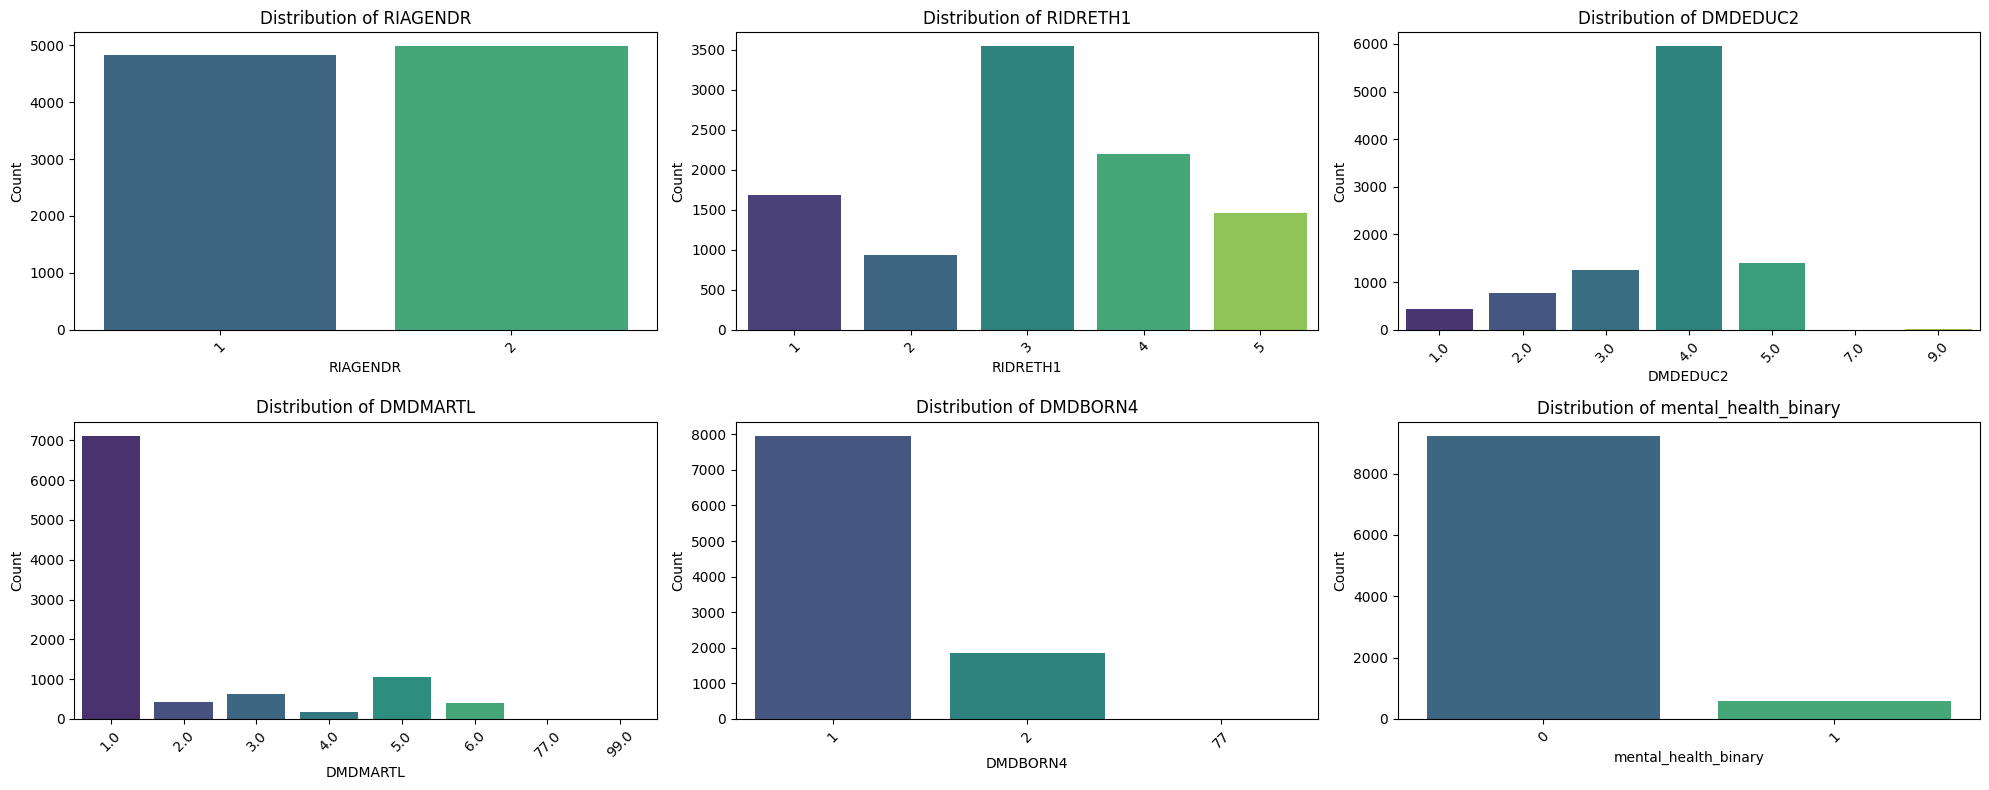

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# -----------------------------
#Categorical Variables Visualization
# -----------------------------
# Select categorical columns (object or category types)
categorical_vars = df.select_dtypes(include=['object', 'category']).columns

n_cols = 3
n_rows = int(np.ceil(len(categorical_vars) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots if the number of variables is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Insights

## 1. Gender (RIAGENDR)

### Categories
- 1 (Male)
- 2 (Female)

**Insight**:  
The distribution shows a slightly larger proportion of females (category 2) than males (category 1). This indicates that the dataset is close to balanced by gender, but with a modest female majority.

---

## 2. Race/Ethnicity (RIDRETH1)

### Categories (Typically coded as)
- Mexican American  
- Other Hispanic  
- Non-Hispanic White  
- Non-Hispanic Black  
- Other Race (Including Multi-Racial)

**Insight**:  
The largest group appears to be category 2 (“Other Hispanic”), followed by category 3 (“Non-Hispanic White”). Categories 1, 4, and 5 are somewhat smaller but still sizable. This distribution may reflect the specific subset of NHANES participants included in the dataset (or a particular oversampling strategy). Understanding these proportions is crucial when analyzing subgroup trends or health disparities.

---

## 3. Education Level (DMDEDUC2)

### Categories (Adults 20+)
- less than 9th grade  
- 9–11th grade (includes 12th grade with no diploma)  
- High school graduate/GED  
- Some college or AA degree  
- College graduate or above

**Insight**:  
“Some college or AA degree” (category 4) has the highest frequency. “High school graduate/GED” (category 3) is next in size, followed by “College graduate or above” (category 5). The smallest categories are those with less than high school education (1 and 2). This suggests that the majority of participants have at least some college experience.

---

## 4. Marital Status (DMDMARTL)

### Typical Categories
- Married  
- Widowed  
- Divorced  
- Separated  
- Never married  
- Living with partner  

**Insight**:  
Married individuals (category 1) form the largest group, closely followed by those who have never married (category 5). Living with a partner (6) is also notable, while widowed (2), divorced (3), and separated (4) are smaller in comparison. This distribution provides a snapshot of social/familial structures that can influence health behaviors and outcomes.

---

## 5. Country of Birth (DMDBORN4)

### Typical Categories (for NHANES)
- Born in 50 US states or Washington, DC  
- Born in a US territory (e.g., Puerto Rico)  
- Born in Mexico  
- Born outside the US (other than Mexico)

**Insight**:  
The largest bar is category 1 (US-born), indicating most participants are native-born. The next largest category is 2 (US territory) or possibly 3 (Mexico), with category 4 also present but smaller. This mix highlights a level of diversity in nativity.



---

## Overall Observations and Considerations

- **Slight Female Majority**:  
  The dataset is almost balanced by gender but leans slightly female. Analyses may need to account for potential gender-related differences in health outcomes.

- **Racial/Ethnic Composition**:  
  The distribution shows a strong representation of Hispanic subgroups, with “Other Hispanic” as the largest category. Any subgroup analyses should consider potential oversampling or weighting factors if generalizing to the US population.

- **Educational Attainment**:  
  A majority have at least some college education, suggesting relatively high educational attainment. Researchers may want to assess how education level correlates with diet, lifestyle, or mental health outcomes.

- **Marital Status**:  
  “Married” and “Never married” are the largest groups. Marital status often correlates with social support and health behaviors, so it may be an important covariate in mental health or chronic disease studies.

- **Nativity**:  
  Most participants are US-born, though there is a sizable minority born in other regions. This can be relevant for culturally tailored interventions, immigration-related stress factors, or acculturation studies.


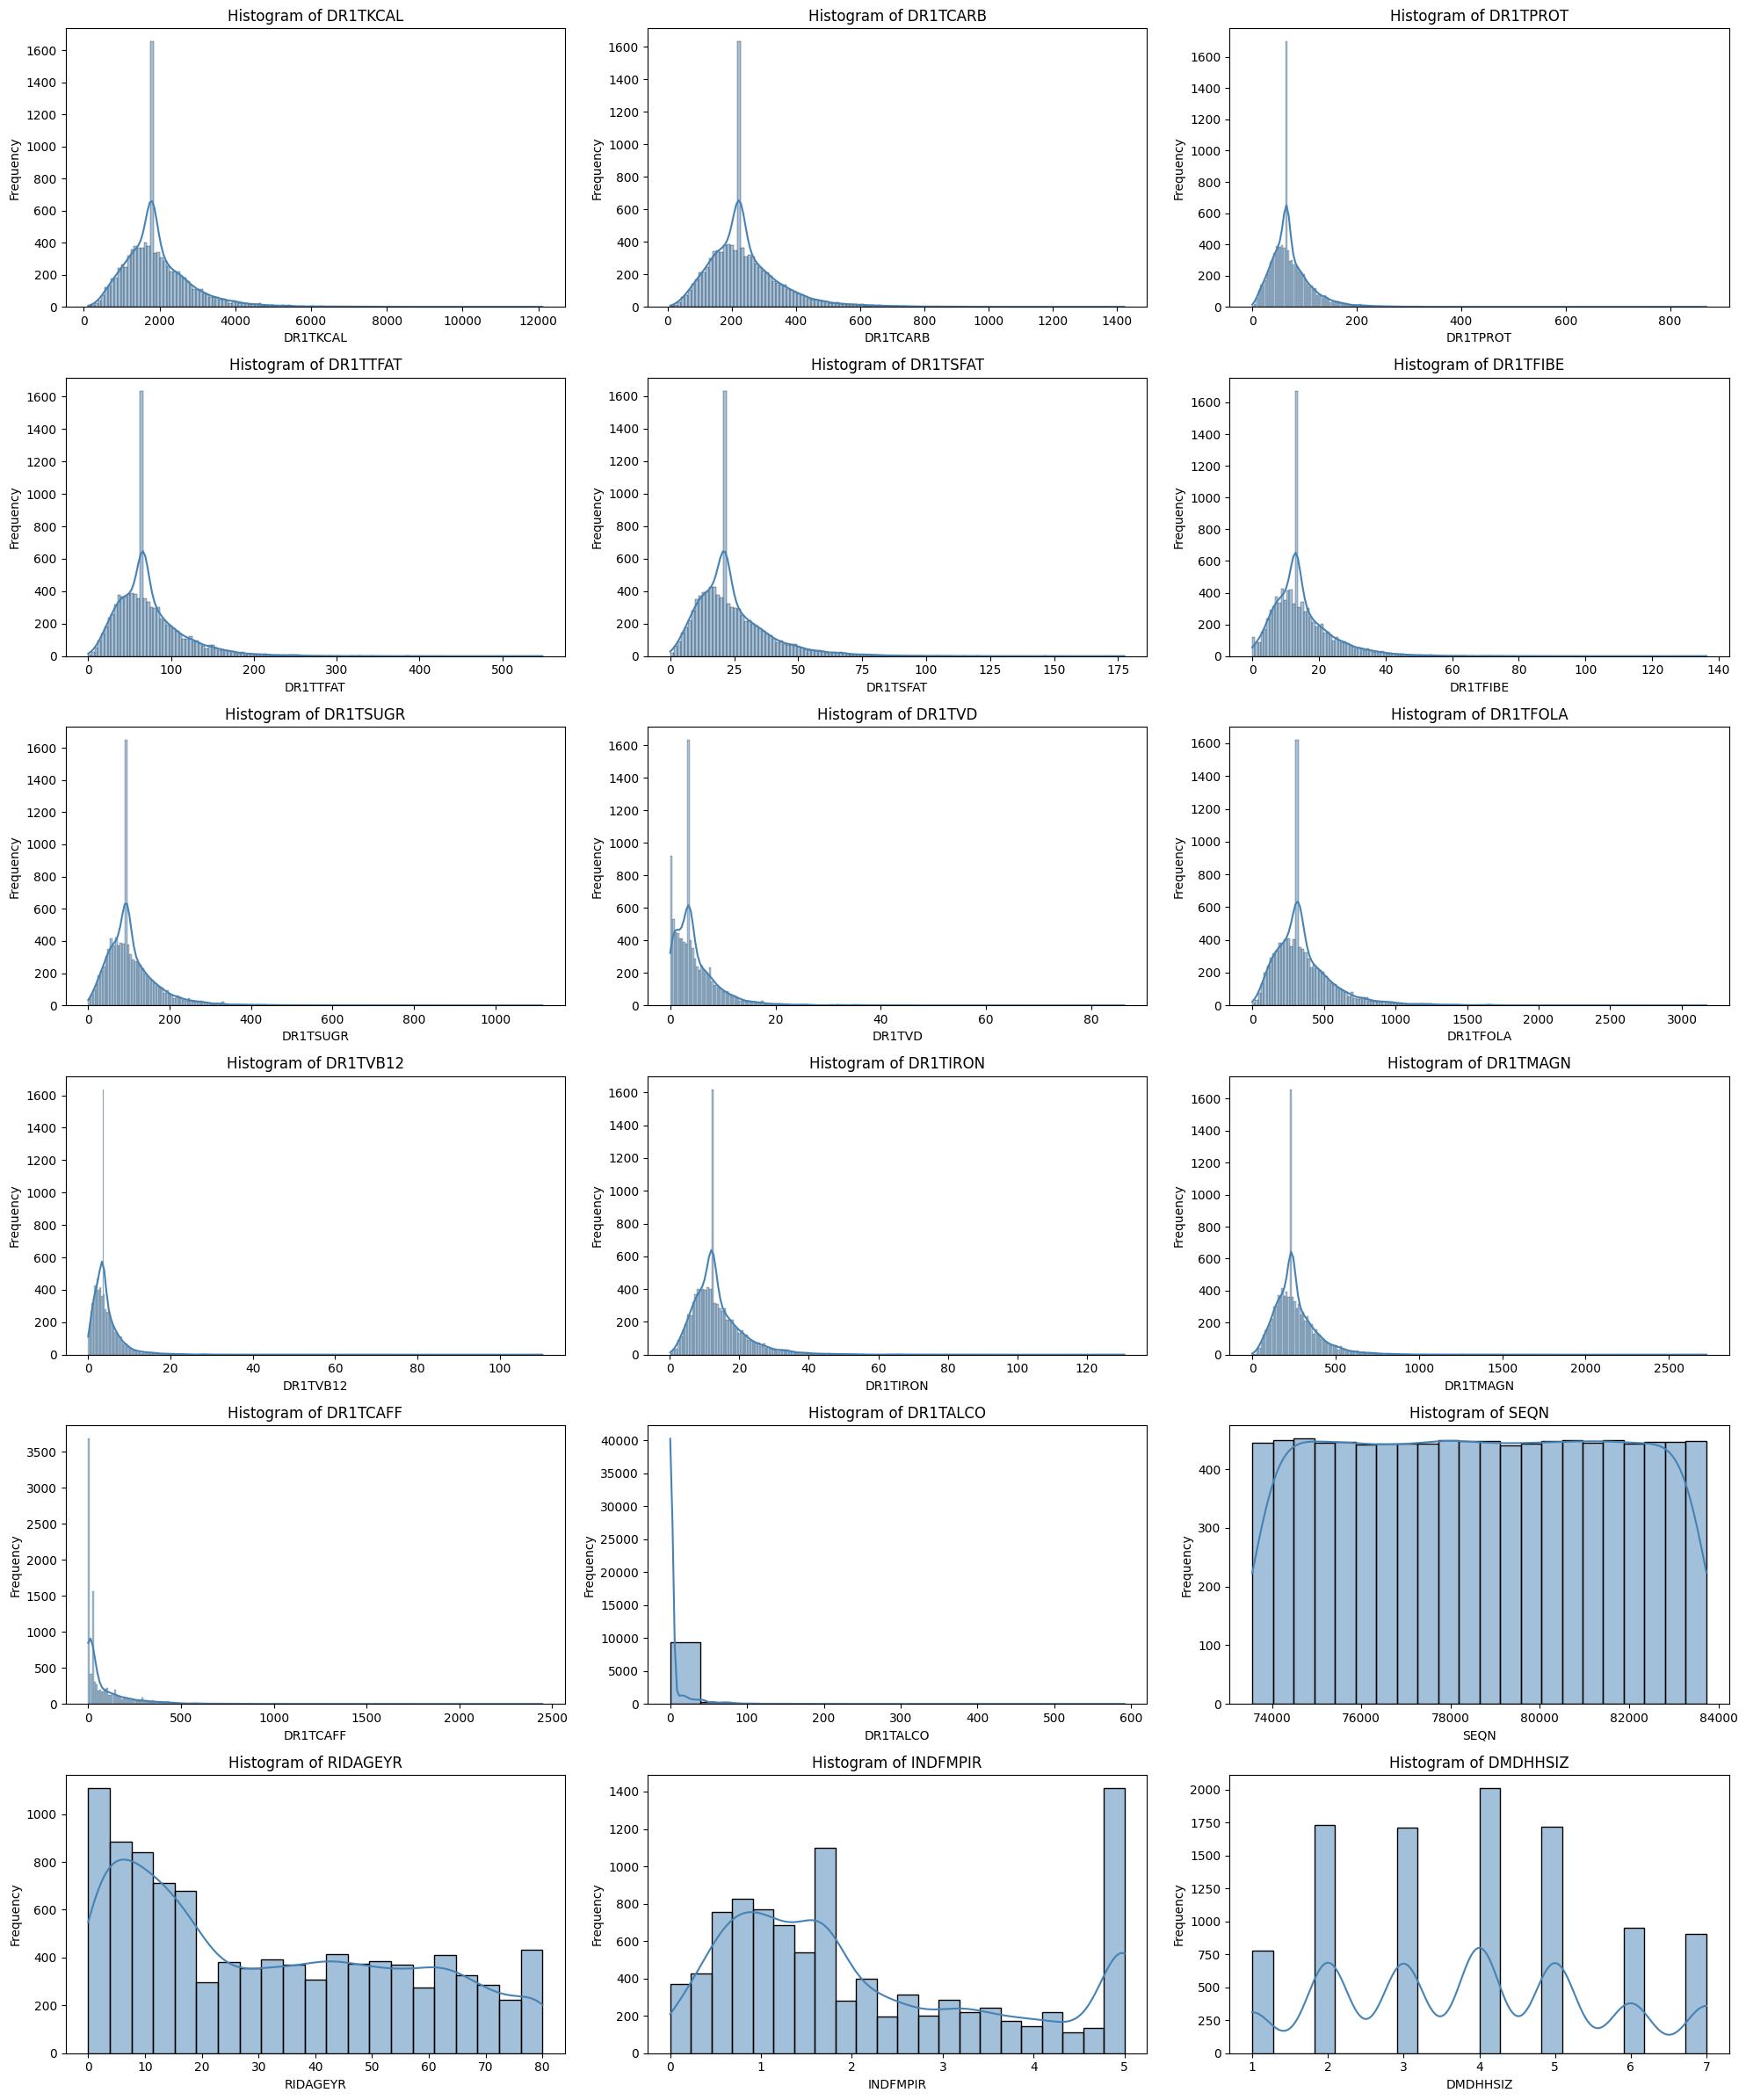

In [12]:
# -----------------------------
# 3. Continuous Variables Visualization
# -----------------------------
# Define a list of continuous variables (adjust list based on your dataset)
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = int(np.ceil(len(continuous_vars) / n_cols))

# Histogram with KDE for continuous variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, ax=axes[i], kde=True, color='steelblue')
    axes[i].set_title(f'Histogram of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Dietary Data Analysis

## 1. Total Energy & Macronutrients
**DR1TKCAL (Total Energy Intake)**  
- **Shape:** Right‐skewed distribution with a concentration around moderate calorie intakes (e.g., ~1,500–2,500 kcal) and a long tail for higher intakes.  
- **Insight:** This is typical of dietary data—most individuals cluster around a moderate range, with a small subset reporting very high intakes.  

**DR1TCARB (Total Carbohydrate), DR1TPROT (Total Protein), DR1TTFAT (Total Fat), DR1TSFAT (Saturated Fat)**  
- **Shape:** All show right‐skewed distributions. Most people consume moderate amounts of each nutrient, but a subset has high intakes.  
- **Insight:** The skew indicates potential outliers (heavy consumers), which may warrant further inspection or transformation (e.g., log transform) for modeling.  

## 2. Fiber and Sugars
**DR1TFIBE (Dietary Fiber), DR1TSUGR (Sugars)**  
- **Fiber:** Typically right‐skewed, with a peak at lower intake and fewer individuals consuming very high fiber.  
- **Sugars:** Also right‐skewed, but often with a wider spread; some individuals have very high sugar intakes.  
- **Insight:** These distributions reflect varying dietary patterns; high sugar intake may be a point of interest for metabolic or mental health studies.  

## 3. Key Micronutrients & Bioactives
**DR1TVD (Vitamin D), DR1TFOLA (Folate), DR1TVB12 (Vitamin B12), DR1TIRON (Iron), DR1TMAGN (Magnesium)**  
- **Shape:** All tend to be heavily right‐skewed. Many participants cluster at lower intakes, with a minority showing very high values.  
- **Insight:** High skew is typical for nutrient data, reflecting differences in supplement use or specific dietary patterns. Researchers should consider whether to treat extreme values as outliers or valid high‐consumption cases.  

**DR1TCAFF (Caffeine)**  
- **Shape:** Wide range from near‐zero to high levels of caffeine consumption.  
- **Insight:** Caffeine intake can vary drastically based on coffee, tea, soda, or energy drink habits. Extreme values could be relevant for certain health outcomes (e.g., sleep, cardiovascular health).  

**DR1TALCO (Alcohol)**  
- **Shape:** Most values near zero, with a subset reporting moderate to high alcohol consumption.  
- **Insight:** This is typical in population data: many non‐drinkers or low‐level drinkers, plus a tail of heavier alcohol intake.  

## 4. Demographics & Socioeconomics
**RIDAGEYR (Age)**  
- **Shape:** Often slightly right‐skewed or nearly uniform across adult ages in NHANES‐type data, but the histogram suggests a peak in mid‐adult ranges and fewer older participants.  
- **Insight:** Understanding age distribution is crucial for controlling for age effects in dietary or mental health analyses.  

**INDFMPIR (Family Income‐to‐Poverty Ratio)**  
- **Shape:** Often right‐skewed, with many participants clustered around lower to moderate income ratios, and a smaller group at higher ratios.  
- **Insight:** This variable is critical for socioeconomic status analysis; it can correlate with dietary quality and health outcomes.  

**DMDHHSIZ (Household Size)**  
- **Shape:** Discrete distribution (1, 2, 3, etc.). Typically peaks around 2–4.  
- **Insight:** Larger households could affect resource allocation and dietary behaviors. The histogram may show a strong peak at 2 or 3 members.  

## 5. Derived Macronutrient Percentage Metrics
**protein_energy_pct, carb_energy_pct, fat_energy_pct**  
- **Shape:** These often cluster around typical dietary proportions (e.g., ~10–20% protein, ~40–60% carbohydrates, ~20–40% fat).  
- **Insight:** Distributions may appear more “normal” than raw intake data. Outliers (e.g., extremely high fat‐energy percentage) can flag unusual diets.  

## Key Observations & Recommendations
### Right‐Skew & Potential Outliers:
- Most intake variables show right‐skewed distributions. This is common in dietary data but may require transformations (e.g., log) or robust methods to address outliers in statistical models.

### Zero-Inflation:
- Alcohol, caffeine, and certain micronutrients have a large number of zeros (or near‐zero) values. Zero‐inflated or two‐part models might be appropriate in advanced analyses.

### Wide Ranges:
- Caffeine, sugars, and total energy intake exhibit broad distributions, indicating diverse dietary habits. Stratified analyses could reveal subgroups with distinct behaviors or health outcomes.

### Socioeconomic & Demographic Variation:
- Age, family income, and household size vary considerably. These factors often interact with dietary behaviors and should be considered confounders or covariates in regression models.

### Derived Percentages:
- The macronutrient percentage distributions (protein, carb, fat) appear less skewed and can be more interpretable in certain contexts (e.g., recommended dietary guidelines). However, they still require checking for extremes or data quality issues.

### Data Quality & Validity Checks:
- Extremely high or low intakes may be due to reporting errors, so further validation (e.g., 24‐hour recall consistency, logic checks) is advisable.


# Bivariate Analysis

### Relationship between continuous variables and Target variable

<ipython-input-13-45329984dcc1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-13-45329984dcc1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-13-45329984dcc1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-13-45329984dcc1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-13-45329984dcc1>:21: FutureWarning: 

Passing `pa

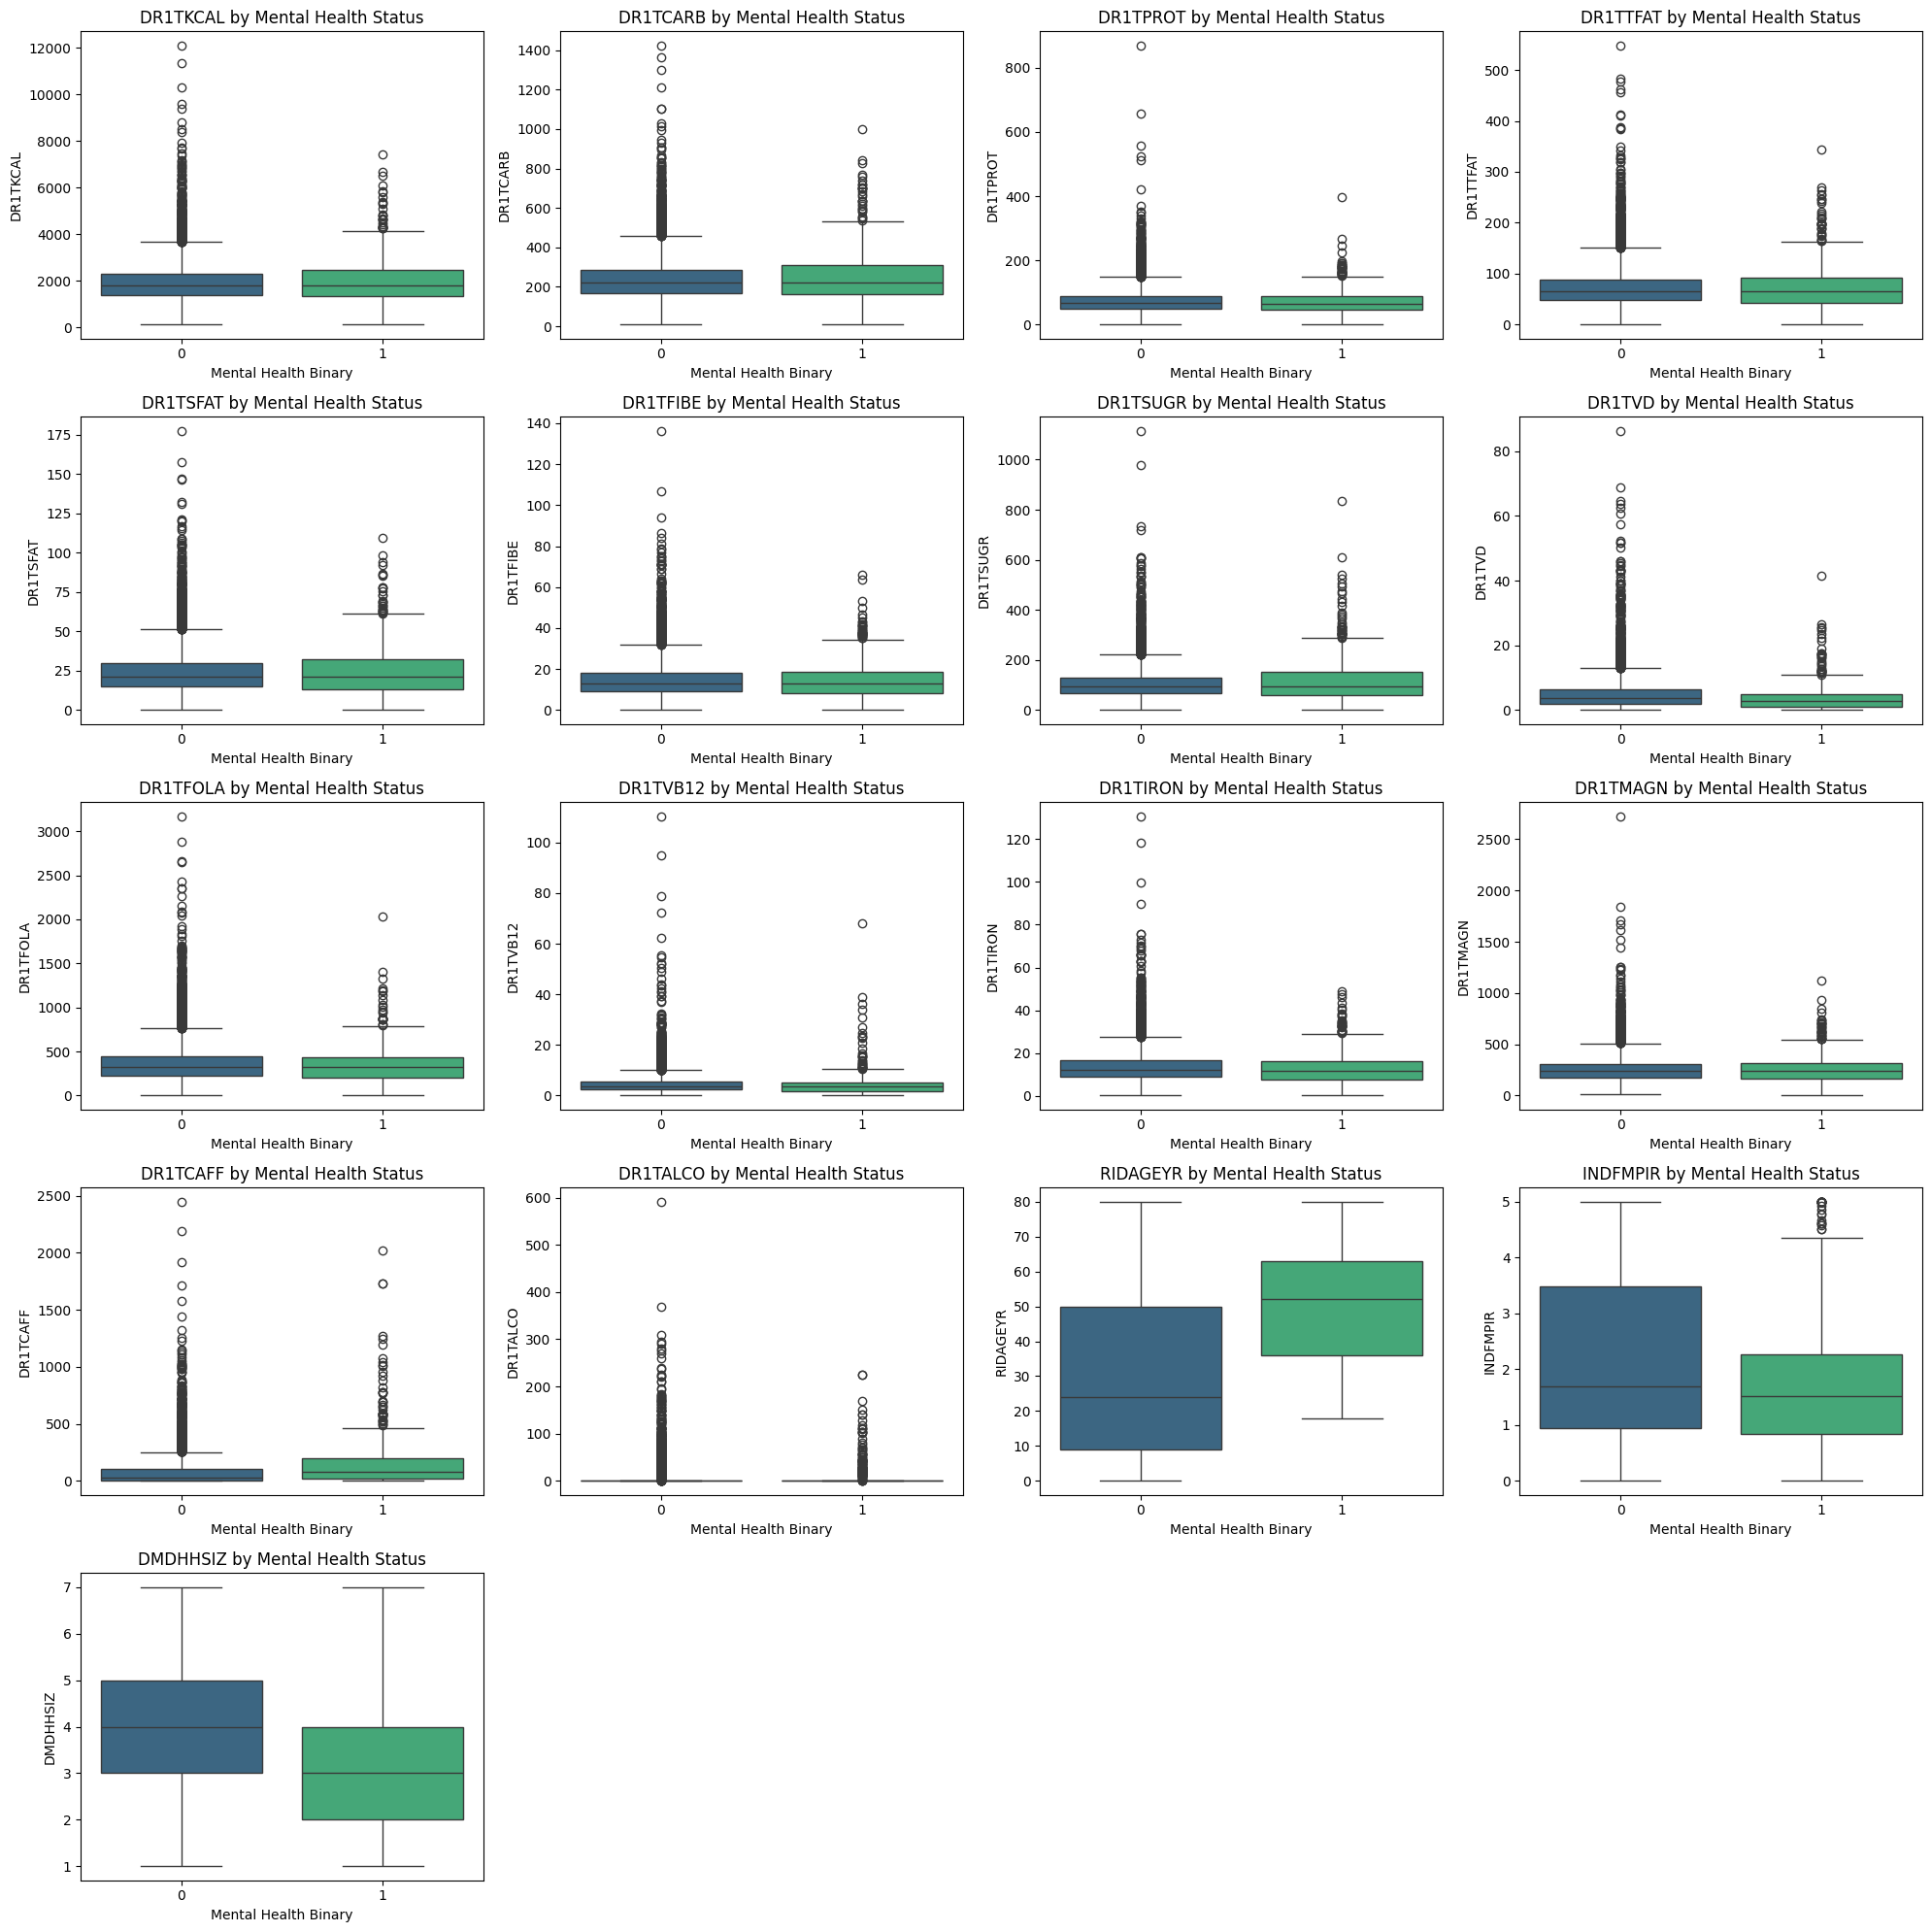

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your continuous variables
continuous_vars = [
    'DR1TKCAL', 'DR1TCARB', 'DR1TPROT', 'DR1TTFAT', 'DR1TSFAT',
    'DR1TFIBE', 'DR1TSUGR', 'DR1TVD', 'DR1TFOLA', 'DR1TVB12',
    'DR1TIRON', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO', 'RIDAGEYR',
    'INDFMPIR', 'DMDHHSIZ'
]

# Number of rows and columns for subplots (adjust as needed)
n_rows = 5
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Loop through each continuous variable and create a box plot against the binary target
for i, var in enumerate(continuous_vars):
    sns.boxplot(
        data=df,
        x='mental_health_binary',  # Replace 'y' with the target variable in your dataset
        y=var,
        ax=axes[i],
        palette='viridis'
    )
    axes[i].set_title(f'{var} by Mental Health Status', fontsize=12)
    axes[i].set_xlabel('Mental Health Binary', fontsize=10)
    axes[i].set_ylabel(var, fontsize=10)

# Remove any unused subplots if the number of continuous variables is fewer than n_rows*n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Comparison of Nutrient Intake and Demographics with Mental Health

## 1. Overall Impressions
- **Similar Medians, Wide Ranges:** Most nutrients and demographic variables show comparable median values between the two groups. This suggests that, at least visually, there are no dramatic mean/median differences.  
- **High Variability:** Many box plots feature wide interquartile ranges and numerous outliers, which is common in self‐reported dietary data (e.g., total energy, caffeine, and alcohol).  

## 2. Nutrient Intake Variables
### Total Energy (DR1TKCAL)  
- Both groups display a similar median energy intake, with a skew toward higher outliers.  
- This implies that overall caloric consumption does not differ drastically between individuals with and without a mental health condition.  

### Macronutrients (DR1TCARB, DR1TPROT, DR1TTFAT, DR1TSFAT)  
- Carbohydrate, protein, total fat, and saturated fat intakes show largely overlapping distributions.  
- Although there are outliers in each group, there is no clear visual shift in medians or IQRs to indicate a strong association with mental health status.  

### Fiber and Sugars (DR1TFIBE, DR1TSUGR)  
- **Fiber (DR1TFIBE):** Also appears quite similar across both groups.  
- **Sugars (DR1TSUGR):** Might show a slightly higher median for the mental health group (1), but the difference is small, and the spread of values is large.  

### Micronutrients (DR1TVD, DR1TFOLA, DR1TVB12, DR1TIRON, DR1TMAGN)  
- Vitamin D, folate, vitamin B12, iron, and magnesium are all heavily right‐skewed, with numerous outliers in both groups.  
- The medians look nearly identical, indicating no major difference in typical micronutrient intake between mental health groups.  

### Caffeine (DR1TCAFF) & Alcohol (DR1TALCO)  
- **Caffeine:** Both groups have a long‐tailed distribution with many outliers, reflecting large variability in coffee, tea, and soda consumption.  
- **Alcohol:** Most values are near zero, with a smaller subset reporting moderate to high intakes. The box plots do not suggest a strong difference between groups, though the mental health group appears to have slightly more outliers.  

## 3. Demographic & Socioeconomic Variables
### Age (RIDAGEYR)  
- The box plots show a broad age range, with both groups having a similar median.  
- There is no clear indication that one group is significantly older or younger based on this visualization alone.  

### Income‐to‐Poverty Ratio (INDFMPIR)  
- Both distributions appear right‐skewed. The mental health group might have a slightly lower median ratio, though the difference is modest.  
- Large variability is evident in both groups, suggesting a wide range of socioeconomic statuses.  

### Household Size (DMDHHSIZ)  
- The median household size is around 2 or 3 in both groups.  
- There is some spread, but again no stark difference is immediately apparent.  

## 4. Key Observations & Considerations
### No Dramatic Visual Differences:  
- From these box plots alone, none of the variables stand out as having a large shift in distribution between the two mental health groups.  

### High Outlier Prevalence:  
- Dietary data frequently exhibit outliers (e.g., very high sugar or caffeine intakes). Analysts should consider whether these outliers are valid or potential data‐entry/reporting errors.  

### Potential Minor Trends:  
- Sugars and Caffeine may show slightly higher medians among those with mental health conditions, but the differences appear small.  
- Income‐to‐Poverty Ratio might be slightly lower for those with mental health conditions, although again the visual difference is not large.  

### Need for Statistical Testing:  
- Box plots provide a quick visual check but do not confirm statistical significance. Formal hypothesis testing (e.g., t‐tests, non‐parametric tests) or modeling (e.g., regression) is necessary to determine whether observed differences are meaningful.  

### Multivariable Context:  
- Mental health status is influenced by numerous factors (e.g., demographics, genetics, lifestyle).  
- Consider adjusting for confounding variables like age, income, and educational level when examining any association between nutrient intake and mental health.  


# Bivariate Analysis

### Relationship between categorical variables and Target variable

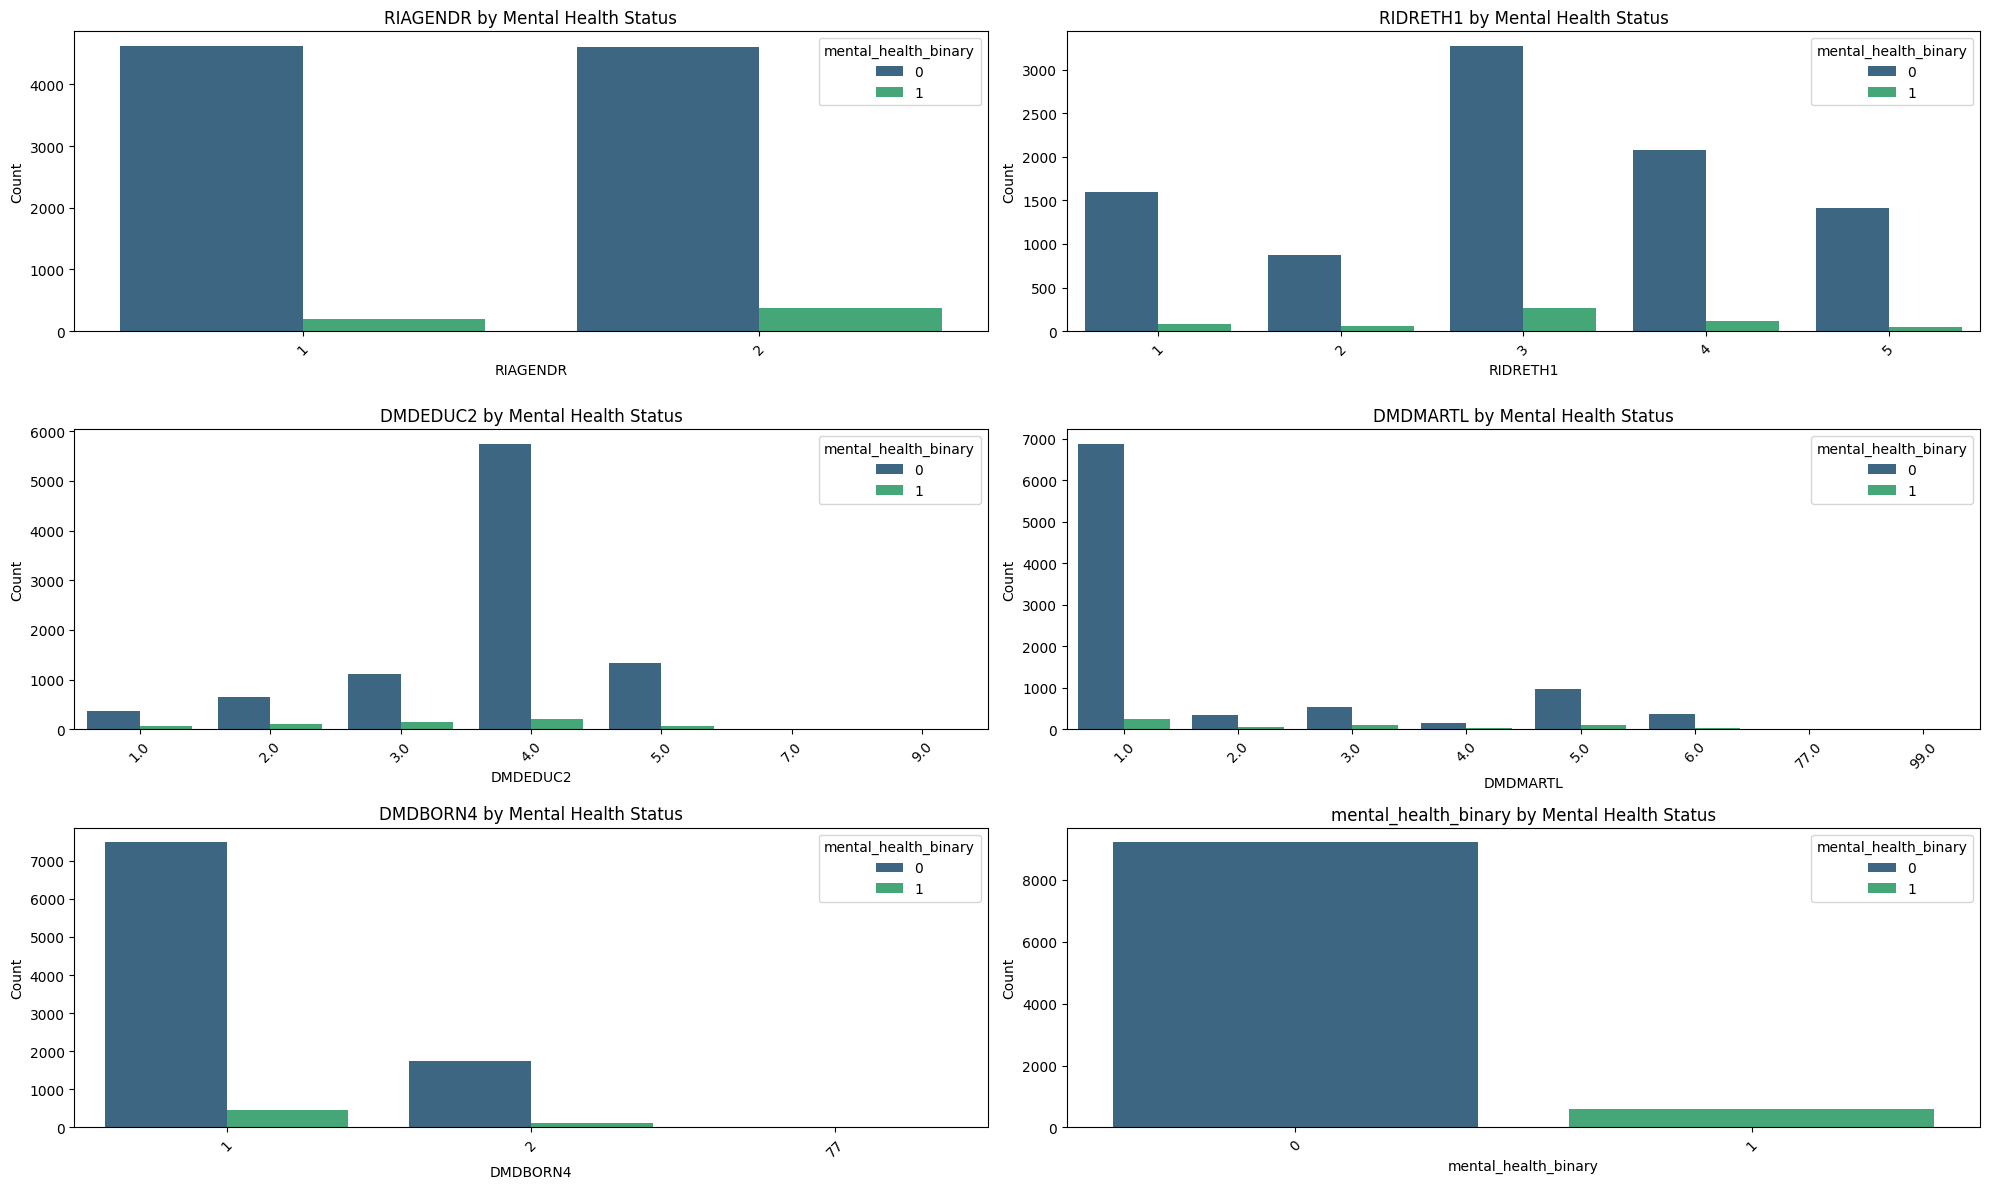

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define the number of rows and columns for your subplots
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(
        data=df,
        x=var,
        hue='mental_health_binary',  # Replace 'y' with the target variable
        ax=axes[i],
        palette='viridis'
    )
    axes[i].set_title(f'{var} by Mental Health Status', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any extra subplots if you have fewer categorical vars than n_rows*n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


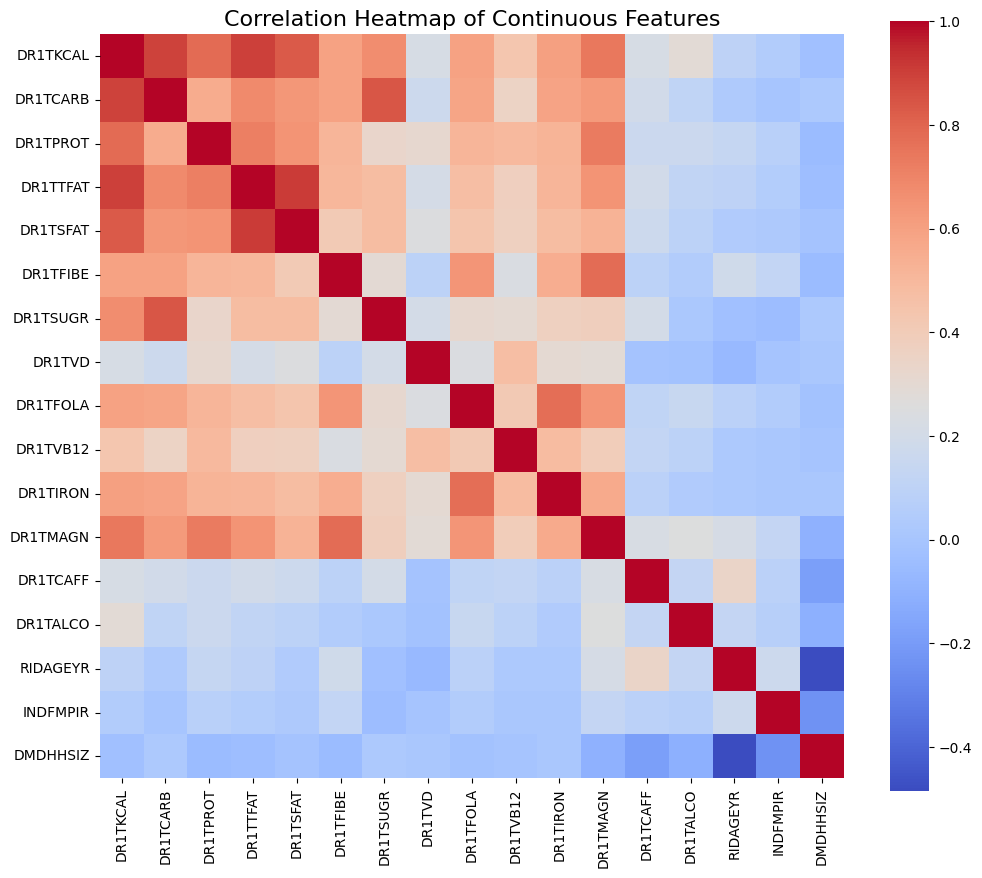

Significant Correlations (|r| >= 0.3):
     Feature1  Feature2  Correlation  AbsCorrelation
71   DR1TSFAT  DR1TTFAT     0.912624        0.912624
55   DR1TTFAT  DR1TSFAT     0.912624        0.912624
51   DR1TTFAT  DR1TKCAL     0.898649        0.898649
3    DR1TKCAL  DR1TTFAT     0.898649        0.898649
1    DR1TKCAL  DR1TCARB     0.892162        0.892162
..        ...       ...          ...             ...
121    DR1TVD  DR1TPROT     0.312613        0.312613
142  DR1TFOLA  DR1TSUGR     0.309776        0.309776
110  DR1TSUGR  DR1TFOLA     0.309776        0.309776
111  DR1TSUGR  DR1TVB12     0.301086        0.301086
159  DR1TVB12  DR1TSUGR     0.301086        0.301086

[114 rows x 4 columns]


In [15]:
continuous_features = [
    'DR1TKCAL', 'DR1TCARB', 'DR1TPROT', 'DR1TTFAT', 'DR1TSFAT',
    'DR1TFIBE', 'DR1TSUGR', 'DR1TVD', 'DR1TFOLA', 'DR1TVB12',
    'DR1TIRON', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO', 'RIDAGEYR',
    'INDFMPIR', 'DMDHHSIZ'
]

# Subset the DataFrame to include only these columns
df_continuous = df[continuous_features].copy()

# --------------------------------------------------
# Compute the Correlation Matrix
# --------------------------------------------------
corr_matrix = df_continuous.corr()

# --------------------------------------------------
#  Create a Correlation Heatmap
# --------------------------------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Continuous Features', fontsize=16)
plt.show()

# --------------------------------------------------
# Summarize Significant Correlations
# --------------------------------------------------
# Flatten the correlation matrix and sort by absolute value
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations (where Feature1 == Feature2)
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Convert to absolute correlation values for filtering and sort descending
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values('AbsCorrelation', ascending=False)

# Define a threshold for "significant" correlation (e.g., |r| >= 0.3)
threshold = 0.3
significant_corr = corr_pairs[corr_pairs['AbsCorrelation'] >= threshold]

print("Significant Correlations (|r| >= 0.3):")
print(significant_corr)



# Key Observations from the Heatmap

## Total Energy vs. Macronutrients
- **DR1TKCAL (Total Energy Intake)** shows strong positive correlations with the absolute amounts of carbohydrate (**DR1TCARB**), protein (**DR1TPROT**), total fat (**DR1TTFAT**), saturated fat (**DR1TSFAT**), and sugars (**DR1TSUGR**).  
- **Insights:** The more total calories someone consumes, the more of each macronutrient (carbs, protein, fat) they tend to eat overall.  

## Saturated Fat and Total Fat
- **DR1TSFAT (Saturated Fat)** is strongly correlated with **DR1TTFAT (Total Fat)**.  
- **Insights:** People who eat more total fat also typically eat more saturated fat, which is a subset of total fat.  

## Carbohydrates and Sugars
- **DR1TCARB (Carbohydrates)** is strongly positively correlated with **DR1TSUGR (Sugars)** and moderately with **DR1TFIBE (Fiber)**.  
- **Insights:** Individuals who consume more total carbohydrates also tend to consume more sugar and more fiber.  

## Micronutrients & Others
- Micronutrients like **Vitamin D (DR1TVD)**, **Folate (DR1TFOLA)**, **Vitamin B12 (DR1TVB12)**, **Iron (DR1TIRON)**, and **Magnesium (DR1TMAGN)** show some moderate correlations with total calorie intake or each other, but none appear extremely strong in the heatmap.  
- **Caffeine (DR1TCAFF)** and **Alcohol (DR1TALCO)** do not show particularly strong correlations with other nutrients or demographic factors, suggesting these intakes may be more independent lifestyle choices.  

## Demographics & Socioeconomics
- **RIDAGEYR (Age)**, **INDFMPIR (Income‐to‐Poverty Ratio)**, and **DMDHHSIZ (Household Size)** do not appear to have strong correlations with most dietary variables.  
- **Insights:** Being older or younger, or having a larger or smaller household, does not necessarily mean you consume drastically different amounts of these nutrients. Family income ratio also does not show a very strong linear relationship with these intake measures in this sample.  

## Significant Correlations Insights
Here are a few of the more notable correlations, described simply:  
- **Total Energy & Carbohydrates:** “People who eat more calories overall also tend to eat more total carbohydrates.”  
- **Saturated Fat & Total Fat:** “When someone’s total fat intake goes up, their saturated fat intake usually goes up too.”  
- **Carbohydrates & Sugars:** “If you eat a lot of carbohydrates, you usually end up eating more sugar as well.”  
- **Micronutrients:** “Vitamins and minerals (like Vitamin D, Iron, Folate) have some moderate relationships with overall calorie intake, but none are extremely high.”


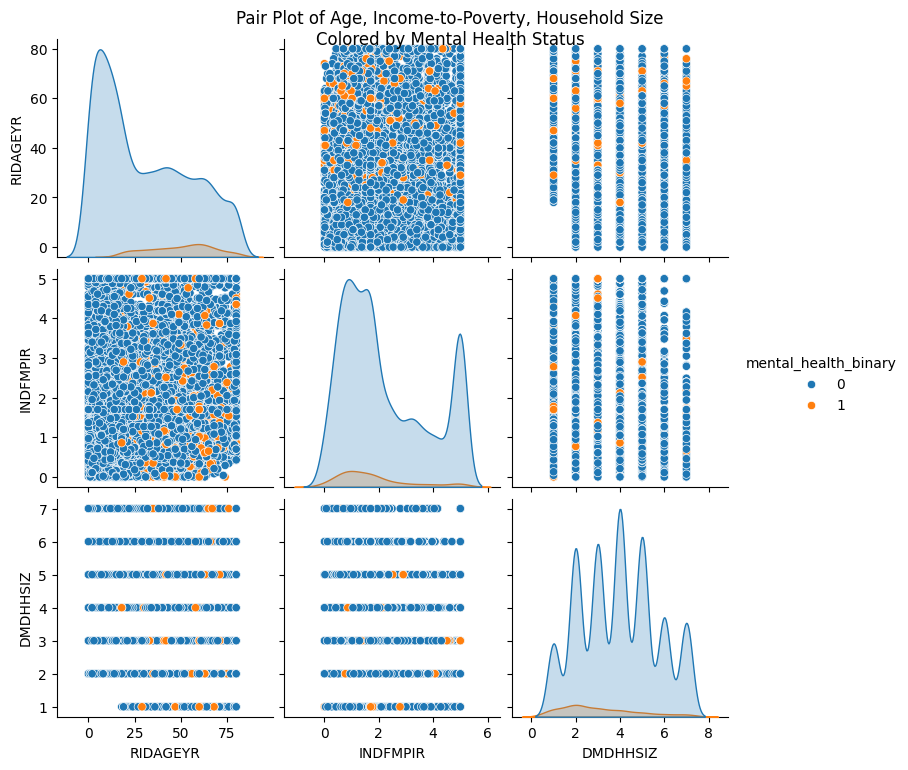

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example subset of columns to explore:
#   - RIDAGEYR (Age)
#   - INDFMPIR (Income-to-Poverty Ratio)
#   - DMDHHSIZ (Household Size)
#   - mental_health_binary (Binary Target)
# Note: Ensure mental_health_binary is a categorical dtype.
df['mental_health_binary'] = df['mental_health_binary'].astype('category')

pairplot_vars = ['RIDAGEYR', 'INDFMPIR', 'DMDHHSIZ']

sns.pairplot(
    data=df,
    vars=pairplot_vars,
    hue='mental_health_binary',   # Color-code by mental health status
    diag_kind='kde'              # Use KDE (Kernel Density Estimate) on the diagonal
)

plt.suptitle("Pair Plot of Age, Income-to-Poverty, Household Size\nColored by Mental Health Status", y=1.02)
plt.show()


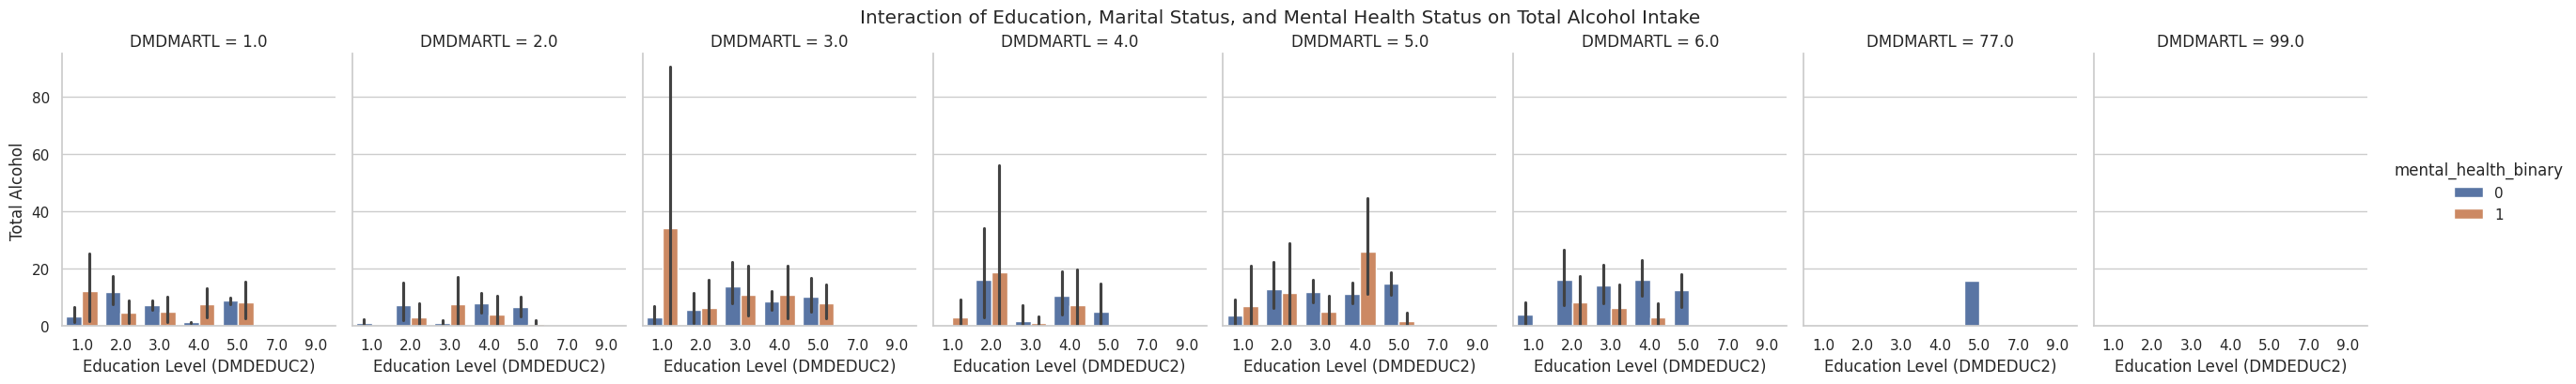

In [17]:
# Example catplot showing how total energy intake (DR1TKCAL) varies
# by education level (DMDEDUC2) and marital status (DMDMARTL),
# stratified by mental health status (mental_health_binary).

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df,
    x='DMDEDUC2',            # Education category on the x-axis
    y='DR1TALCO',            # Numeric outcome (Total Alcohol intake)
    hue='mental_health_binary',  # Separate colors by mental health status
    col='DMDMARTL',          # Facet (column) by marital status
    kind='bar',              # Bar plot (can also use 'point', 'box', etc.)
    height=4, aspect=0.8
)

g.fig.suptitle("Interaction of Education, Marital Status, and Mental Health Status on Total Alcohol Intake", y=1.02)
g.set_axis_labels("Education Level (DMDEDUC2)", "Total Alcohol")
plt.show()


# Alcohol Consumption Analysis

## 1. Overall Alcohol Consumption
### Mostly Low or Near Zero
- In most columns, the bars are close to zero, suggesting that many individuals in these groups do not consume much alcohol on a daily basis (or do not drink at all).

### Occasional Higher Averages
- A few groups have taller bars, which could indicate smaller sample sizes (fewer people in that category) or a handful of individuals reporting higher alcohol consumption.

## 2. Education Level (DMDEDUC2)
Typical NHANES‐like codes might be:
- Less than 9th grade  
- 9–11th grade (no diploma)  
- High school graduate/GED  
- Some college or AA degree  
- College graduate or above  
- (Other codes, like 9, might be unknown/missing.)

### No Clear Trend by Education
- There is no obvious pattern where more or less schooling consistently relates to higher or lower alcohol intake. Averages remain low in most education groups, with a few spikes that appear sporadic.

## 3. Marital Status (DMDMARTL)
Typical codes could be:
- Married  
- Widowed  
- Divorced  
- Separated  
- Never Married  
- Living with partner  
- 77/99. Refused / Don’t Know  

### Similar Low Levels
- Whether married, divorced, never married, or living with a partner, most bars indicate relatively low daily alcohol consumption on average.

### Small Groups
- Categories like 77 or 99 (Refused/Don’t Know) might show unusual heights because they contain fewer participants.

## 4. Mental Health Status Differences
### Orange vs. Blue Bars
- The difference between mental health status 1 (orange) and status 0 (blue) is not dramatic in most columns. Some are slightly higher or lower, but there’s no uniform pattern across all marital and education levels.

### Minor Variations
- Where bars differ, the gap is generally small, suggesting that having a mental health condition does not strongly drive daily alcohol intake in these groups.

## 5.  Summary
- **Low Alcohol Intake Overall:** Most people, regardless of education level, marital status, or mental health, report little to no daily alcohol consumption.  
- **Occasional Higher Spikes:** Certain categories spike higher, but this is likely due to fewer participants or a few individuals who drink more.  
- **No Major Group Gaps:** Education and marital status do not show a clear, consistent effect on drinking habits. Similarly, those with and without a mental health condition often have comparable alcohol intake.  
- **Further Analysis:** If you want to confirm whether small differences are meaningful, you’d need additional statistical tests or more in‐depth study. However, at a glance, this chart indicates that most people in the dataset do not consume large amounts of alcohol daily, and demographic factors alone do not appear to dramatically change that behavior.


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

# Example DataFrame: df
# Numeric variable to compare (e.g., total energy intake)
numeric_var = 'DR1TKCAL'          # Adjust to your numeric column
# Binary grouping variable (e.g., mental health status)
group_var = 'mental_health_binary' # Adjust if your target column has a different name

# Separate the data into two groups based on the binary variable
group0 = df[df[group_var] == 0][numeric_var].dropna()
group1 = df[df[group_var] == 1][numeric_var].dropna()

############################################
# 1. Independent Samples T-test
############################################
# Assumes the data is (approximately) normally distributed in each group
# and the observations are independent.

t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
print(f"T-test for {numeric_var} by {group_var}:")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

############################################
# 2. Mann-Whitney U Test
############################################
# A non-parametric test that does not assume normal distribution.

u_stat, p_val_mw = mannwhitneyu(group0, group1, alternative='two-sided')
print(f"\nMann-Whitney U test for {numeric_var} by {group_var}:")
print(f"U-statistic = {u_stat:.3f}, p-value = {p_val_mw:.3f}")


T-test for DR1TKCAL by mental_health_binary:
t-statistic = -1.937, p-value = 0.053

Mann-Whitney U test for DR1TKCAL by mental_health_binary:
U-statistic = 2643701.500, p-value = 0.403


# Statistical Test Results

## Based on the results, here’s what we can conclude:

### T-test Result:
- **t-statistic:** -1.937  
- **p-value:** 0.053  
- The p-value is just above the conventional **0.05 threshold**. This means that the difference in total energy intake (**DR1TKCAL**) between the two mental health groups is almost significant, but not quite.  
- It suggests a borderline or marginal difference—if we had a slightly larger sample size or less variability, we might see a significant effect.  

### Mann-Whitney U Test Result:
- **U-statistic:** 2643701.500  
- **p-value:** 0.403  
- This non-parametric test shows a much higher p-value, which strongly indicates that there is no statistically significant difference between the groups.


## Applying Transformations and Deriving new features

In [19]:
#########################################
# 1. Derived Macronutrient Energy Contributions
#########################################
# Note: Protein and Carbohydrates provide 4 kcal/g; Fat provides 9 kcal/g.
df['protein_energy'] = df['DR1TPROT'] * 4
df['carb_energy'] = df['DR1TCARB'] * 4
df['fat_energy'] = df['DR1TTFAT'] * 9

# Calculate the percentage contribution of each macronutrient to total energy.
# Use np.where to avoid division by zero.
df['protein_pct'] = np.where(df['DR1TKCAL'] > 0, df['protein_energy'] / df['DR1TKCAL'], np.nan)
df['carb_pct'] = np.where(df['DR1TKCAL'] > 0, df['carb_energy'] / df['DR1TKCAL'], np.nan)
df['fat_pct'] = np.where(df['DR1TKCAL'] > 0, df['fat_energy'] / df['DR1TKCAL'], np.nan)

#########################################
# 2. Log Transformation for Skewed Variables
#########################################
# Many nutrient intake variables are right-skewed.
# Log transformation (using log1p to handle zeros) can help stabilize variance.
df['log_DR1TKCAL'] = np.log1p(df['DR1TKCAL'])
df['log_DR1TCARB'] = np.log1p(df['DR1TCARB'])
df['log_DR1TCAFF'] = np.log1p(df['DR1TCAFF'])
# Add additional log transformations for other variables if needed.

#########################################
# 3. Creating Binary Features Based on Quantiles
#########################################
# Example: Create a binary feature for "high sugar intake" using the 75th percentile.
sugar_threshold = df['DR1TSUGR'].quantile(0.75)
df['high_sugar'] = np.where(df['DR1TSUGR'] >= sugar_threshold, 1, 0)

# Similarly, for alcohol intake:
alcohol_threshold = df['DR1TALCO'].quantile(0.75)
df['high_alcohol'] = np.where(df['DR1TALCO'] >= alcohol_threshold, 1, 0)

#########################################
# 4. Recoding Categorical Variables to Meaningful Labels
#########################################
# Example for Gender (assuming 1 = Male, 2 = Female)
df['gender'] = df['RIAGENDR'].replace({1: 'Male', 2: 'Female'})

# Example for Education Level (DMDEDUC2)
education_map = {
    1: '<9th grade',
    2: '9-11th grade',
    3: 'High school graduate/GED',
    4: 'Some college/AA degree',
    5: 'College graduate or above'
}
df['education'] = df['DMDEDUC2'].map(education_map)

# Example for Marital Status (DMDMARTL)
marital_map = {
    1: 'Married',
    2: 'Widowed',
    3: 'Divorced',
    4: 'Separated',
    5: 'Never married',
    6: 'Living with partner',
    77: 'Refused',
    99: "Don't know"
}
df['marital_status'] = df['DMDMARTL'].map(marital_map)

#########################################
# 5. Creating Age Groups
#########################################
# Create an age group variable based on RIDAGEYR.
# Adjust bins and labels as needed.
df['age_group'] = pd.cut(df['RIDAGEYR'],
                         bins=[0, 18, 35, 50, 65, 100],
                         labels=['Child', 'Young Adult', 'Adult', 'Mid-Age', 'Senior'],
                         right=False)

# Print out the first few rows to verify the new features
print("Feature engineering complete. Preview of new features:")
print(df[['DR1TKCAL', 'protein_energy', 'carb_energy', 'fat_energy',
          'protein_pct', 'carb_pct', 'fat_pct', 'log_DR1TKCAL',
          'high_sugar', 'high_alcohol', 'gender', 'education', 'marital_status', 'age_group']].head())


Feature engineering complete. Preview of new features:
   DR1TKCAL  protein_energy  carb_energy  fat_energy  protein_pct  carb_pct  \
0    1574.0          174.52       958.36      475.29     0.110877  0.608869   
1    5062.0         1352.52      1695.12     1118.61     0.267191  0.334872   
2    1743.0          258.44       897.56      593.73     0.148273  0.514951   
3    1490.0          311.00       651.68      524.43     0.208725  0.437369   
4    1421.0          220.96       712.80      498.24     0.155496  0.501619   

    fat_pct  log_DR1TKCAL  high_sugar  high_alcohol  gender  \
0  0.301963      7.362011           1             1    Male   
1  0.220982      8.529714           0             1    Male   
2  0.340637      7.463937           0             1    Male   
3  0.351966      7.307202           0             1    Male   
4  0.350626      7.259820           0             1  Female   

                   education marital_status age_group  
0   High school graduate/GED      S

<ipython-input-19-65406a2910fc>:40: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['gender'] = df['RIAGENDR'].replace({1: 'Male', 2: 'Female'})


## Applying StandardScaler & OneHot Encoding

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assume df is already loaded and preprocessed (from previous steps)
# Define the list of numeric columns (e.g., nutrient intakes and demographic variables)
numeric_cols = [
    'DR1TKCAL', 'DR1TCARB', 'DR1TPROT', 'DR1TTFAT', 'DR1TSFAT',
    'DR1TFIBE', 'DR1TSUGR', 'DR1TVD', 'DR1TFOLA', 'DR1TVB12',
    'DR1TIRON', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO', 'RIDAGEYR',
    'INDFMPIR', 'DMDHHSIZ', 'protein_energy', 'carb_energy', 'fat_energy',
    'protein_pct', 'carb_pct', 'fat_pct', 'log_DR1TKCAL',
    'high_sugar', 'high_alcohol'
]

# Define the list of categorical columns (using recoded labels or original codes)
categorical_cols = [
    'gender',        # Derived from RIAGENDR (e.g., 'Male', 'Female')
    'education',     # Derived from DMDEDUC2 (e.g., '<9th grade', 'High school graduate/GED', etc.)
    'marital_status',# Derived from DMDMARTL (e.g., 'Married', 'Divorced', etc.)
    'age_group',     # Derived from RIDAGEYR (e.g., 'Young Adult', 'Adult', etc.)
]

# Create a ColumnTransformer that scales numeric features and one-hot encodes categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Apply the transformations (fit and transform the data)
df_transformed = preprocessor.fit_transform(df)

# The resulting df_transformed is a NumPy array.
print("Transformed Data Shape:", df_transformed.shape)


Transformed Data Shape: (9813, 43)


## Modeling
### Logistic Regression as Baseline Model


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# -----------------------------
# 2. Define Features and Target
# -----------------------------
numeric_cols = [
    'DR1TKCAL', 'DR1TCARB', 'DR1TPROT', 'DR1TTFAT', 'DR1TSFAT',
    'DR1TFIBE', 'DR1TSUGR', 'DR1TVD', 'DR1TFOLA', 'DR1TVB12',
    'DR1TIRON', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO', 'RIDAGEYR',
    'INDFMPIR', 'DMDHHSIZ', 'protein_energy', 'carb_energy', 'fat_energy',
    'protein_pct', 'carb_pct', 'fat_pct', 'log_DR1TKCAL',
    'high_sugar', 'high_alcohol'
]

# Define the list of categorical columns (using recoded labels or original codes)
categorical_cols = [
    'gender',        # Derived from RIAGENDR (e.g., 'Male', 'Female')
    'education',     # Derived from DMDEDUC2 (e.g., '<9th grade', 'High school graduate/GED', etc.)
    'marital_status',# Derived from DMDMARTL (e.g., 'Married', 'Divorced', etc.)
    'age_group',     # Derived from RIDAGEYR (e.g., 'Young Adult', 'Adult', etc.)
]

target = 'mental_health_binary'

# -----------------------------
# 3. Create a Preprocessing Pipeline
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# -----------------------------
# 4. Split the Data into Training and Testing Sets
# -----------------------------
X = df[numeric_cols + categorical_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# -----------------------------
# 5. Build a Pipeline with Logistic Regression
# -----------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# -----------------------------
# 6. Train the Model
# -----------------------------
pipeline.fit(X_train, y_train)

# -----------------------------
# 7. Evaluate the Model
# -----------------------------
y_pred = pipeline.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2768    0]
 [ 171    5]]


In [22]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Obtain predictions and predicted probabilities for the positive class
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the positive class (assumed label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Create a DataFrame to display the results as a table
results_df = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'AUC': [auc],
    'Accuracy': [accuracy]
})

results_df


,Model,Precision,Recall,F1-Score,AUC,Accuracy
0,Logistic Regression,1.0,0.028409,0.055249,0.819662,0.941916


# Evaluation Metrics Analysis

## 1. Valid Interpretation of an Evaluation Metric
### Precision (1.0):
- Precision measures the proportion of instances predicted as positive that are truly positive. A precision of **1.0** means that every case the model flagged as having a mental health condition was indeed a true positive. However, because precision does not account for missed positives (false negatives), this value must be interpreted alongside other metrics.

### Recall (0.028):
- Recall, also known as **sensitivity**, is the proportion of actual positive cases that were correctly identified by the model. In the results, a recall of **0.028** means that the model identified only about **2.8%** of the individuals who actually have a mental health condition. This clearly indicates that, despite the perfect precision, the model is missing a vast majority of positive cases.

### Precision:
- **Rationale:** In healthcare applications, high precision is important when the cost of a false positive is high (e.g., unnecessary stress for a patient or unwarranted follow-up tests). Here, a precision of **1.0** tells us that if the model flags someone as having a mental health condition, we can be very confident that this prediction is correct.

### Recall:
- **Rationale:** Recall is critical in healthcare, especially when the risk of missing a diagnosis is unacceptable. A very low recall (**2.8%** in this case) is concerning because it indicates that the model is not capturing most of the individuals with the condition. This could lead to under-diagnosis and missed opportunities for early intervention.

### F1-Score (0.055):
- **Rationale:** The **F1-Score** combines precision and recall into a single metric using their harmonic mean. It provides a more balanced view of the model performance when dealing with imbalanced datasets. In your case, the low F1-Score reflects the model's poor ability to identify positive cases, despite high precision.

### AUC (0.819662):
- **Rationale:** The **Area Under the ROC Curve (AUC)** measures the model's overall ability to distinguish between classes, regardless of the chosen threshold. An AUC of about **0.82** suggests that, when considering the ranking of cases by predicted probability, the model has a good discriminative ability. This is important for understanding the model's potential, even if the fixed threshold performance (as reflected by recall) is poor.

### Accuracy (0.941916):
- **Rationale:** **Accuracy** indicates the overall proportion of correct predictions. However, in imbalanced datasets—such as one where the positive class (mental health condition) is rare—a high accuracy can be misleading. The high accuracy here is driven by the model correctly identifying the majority negative class, while missing almost all positive cases.

## Summary
- **Precision:** Tells us that if the model flags someone as having a mental health issue, it’s almost certainly right.
- **Recall:** Tells us that the model is missing almost all the people who actually have the issue, capturing only about **3%** of them.
- **F1-Score:** Provides a combined picture of these two metrics, and the low value indicates that the model isn’t very useful in practice despite its high precision.
- **AUC:** Suggests that the model can rank individuals by risk fairly well, even though the fixed threshold used in classification leads to low recall.
- **Accuracy:** Appears high because most individuals do not have the condition, but this masks the fact that the model fails to identify the positives.
